# PIT dataset analysis

Load dataset (requires python 2.7)

In [81]:
from __future__ import division
import matplotlib.pyplot as plt

fibdataset = open('datasets/1Mdataset.unique.sorted.fib')

Method for processing each entry to generate usefull data

In [75]:
def get_levels_count(entry):
    return entry.count('/')

In [124]:
def get_character_count(entry):
    return len(entry)

Process the dataset

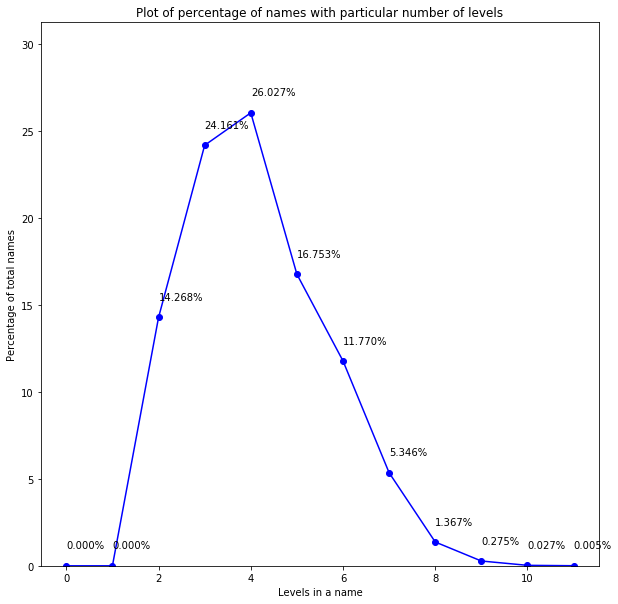

In [138]:
levelCountList = [] # Stores level count of each entry   
highestLevel = 0 # Counts highest level that appears in dataset
count = 0
for line in fibdataset:
    levels = get_levels_count(line)
    levelCountList.append(levels)
    
    if (levels > highestLevel):
        highestLevel = levels
        
    count += 1
fibdataset.seek(0) # Resets cur pos to starting of file

levelCountList2 = [0]*highestLevel

for level in levelCountList:
    levelCountList2[level-1] += 1
    
for i in range(highestLevel):
    levelCountList2[i] /= count/100

    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_ylim(0, max(levelCountList2) * 1.2)

plt.plot(levelCountList2, 'b-o')

x = []
for i in range(highestLevel):
    x.append(i)
    
for i,j in zip(x, levelCountList2):
    ax.annotate(str(str('%.3f'%j) + '%'),xy=(i,j+1))
plt.title('Plot of percentage of names with particular number of levels')

plt.xlabel('Levels in a name')
plt.ylabel('Percentage of total names')

plt.show()

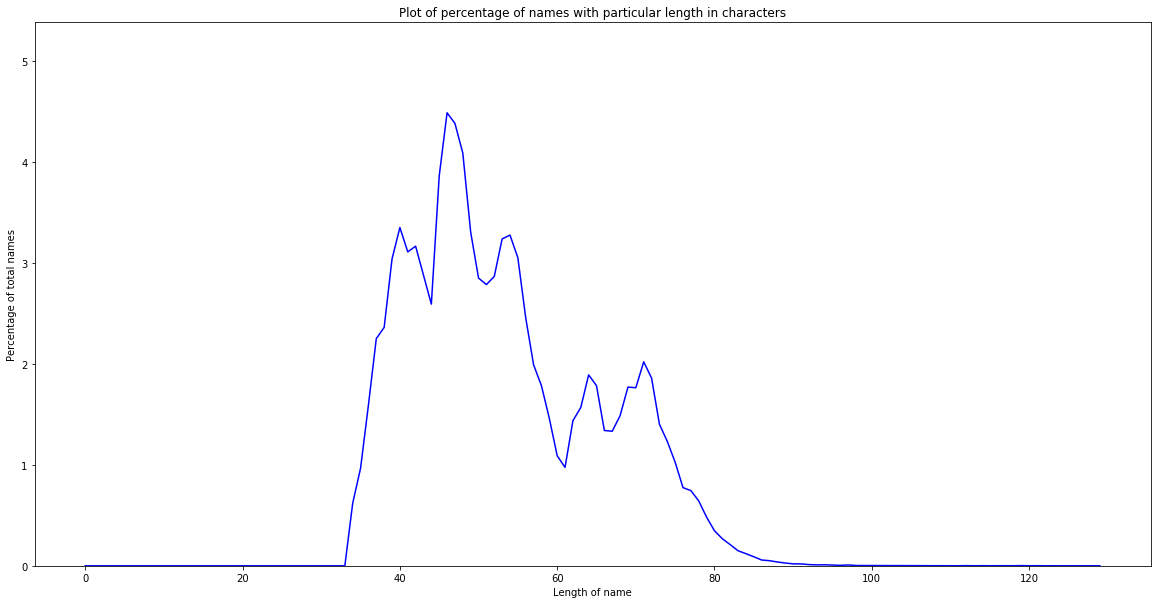

In [142]:
levelCountList = [] # Stores level count of each entry   
highestLevel = 0 # Counts highest level that appears in dataset
count = 0
for line in fibdataset:
    levels = get_character_count(line)
    levelCountList.append(levels)
    
    if (levels > highestLevel):
        highestLevel = levels
        
    count += 1
fibdataset.seek(0) # Resets cur pos to starting of file

levelCountList2 = [0]*highestLevel

for level in levelCountList:
    levelCountList2[level-1] += 1
    
for i in range(highestLevel):
    levelCountList2[i] /= count/100

    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_ylim(0, max(levelCountList2) * 1.2)

plt.plot(levelCountList2, 'b-')

x = []
for i in range(highestLevel):
    x.append(i)
    
# for i,j in zip(x, levelCountList2):
#     ax.annotate(str('%.3f'%j),xy=(i,j+0.5))
plt.title('Plot of percentage of names with particular length in characters')

plt.xlabel('Length of name')
plt.ylabel('Percentage of total names')

plt.show()